### Hybrid models using modified carrying capacity

In [283]:
clear;

### Existing params, variables
# B, R are the numbers of robots for blue and red
# r, b are the fighting effectiveness of each side's robots
# kB, kR carrying capacity

### New parameters that affect carrying capacity
# pB, pR are protection (from friendly fire, guns, general space wear and tear)
# sB, sR are the area around the robots/drones that must be clear of friendly fire otherwise they get destroyed.

function dydt = odeHybrid(t,y,b,r,pB,pR,sB,sR)
    rMoon=1731.1;
    a=rMoon+1; # Let's keep volume close to moon surface ~1km
    V=(4/3)*pi*(a^3-rMoon^3); #volume around moon, not including moon
    B = y(1);
    R = y(2);
    battleSpace = 1/32; # How much of the moon's surface is in the battle
    kB = V/sB * pB * battleSpace; # To see the effect on a small number of forces, we should keep the battle space small, to simular friendly fire
    kR = V/sR * pR * battleSpace;
    dydt(1) = B*(kB - B - r*R)/kB;
    dydt(2) = R*(kR - R - b*B)/kR;
end

In [284]:
function y_end = simulatePlotHybrid(b,r,pB,pR,sB,sR,B,R)

    tspan = [0 50];
    % initial B and R
    y0 = [B R];
    [t, y] = ode45(@(t,y) odeHybrid(t,y,b,r,pB,pR,sB,sR),tspan,y0,1);
    yB = y(:,1);
    yR = y(:,2);
    
    y_end=y(:,end);

    figure;
    plot(t,yB,'b','LineWidth',3);
    hold on;
    plot(t,yR,'r','LineWidth',3);
    legend({'Blue Force','Red Force'});
    xlabel('Time')
    ylabel('Number of Units(Blue and Red)')

end

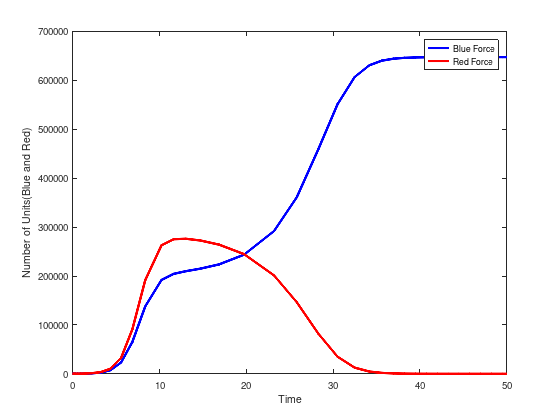

In [279]:
# The red team has more craft to start and has slightly better attrition rate
# but the blue team has better protection
# There is a point where the red crowds itself out

B=100;
R=140;
b=1.5;
r=1.55;
pB=1.1; #this increases carrying capacity
pR=1;
sB=2;#this reduces carrying capacity
sR=2;
simulatePlotHybrid(b,r,pB,pR,sB,sR,B,R);

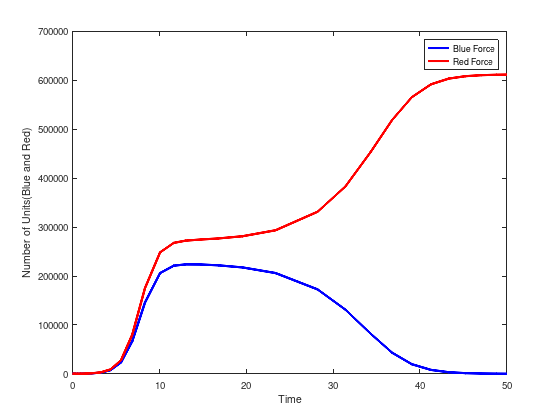

In [280]:
# The same scenario where red starts with fewer craft than last time,
# but has instead upgraded its protection very slightly

B=100;
R=120;
b=1.5;
r=1.55;
pB=1.1;
pR=1.04;
sB=2;
sR=2;
simulatePlotHybrid(b,r,pB,pR,sB,sR,B,R);

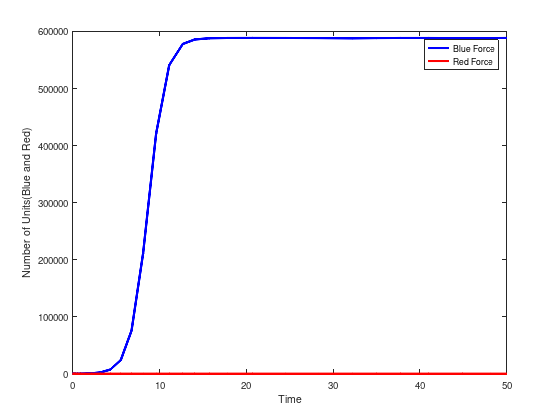

In [281]:
# In the absence of an enemy a force still experiences logistic growth.
# There must be some factor apart from friendly fire. EG space wear and tear.

B=100;
R=0;
fB=1.5;
fR=1.5;
pB=1;
pR=1;
sB=2;
sR=2;
simulatePlotHybrid(fB,fR,pB,pR,sB,sR,B,R);

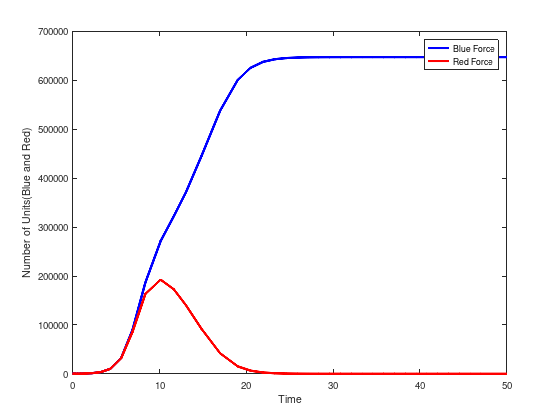

In [282]:
# Equal attrition rate, equal numbers to start, but blue has a better "protection" and 
# that increases the carrying capacity

B=140;
R=140;
fB=1.5;
fR=1.5;
pB=1.1;
pR=1;
sB=2;
sR=2;
simulatePlotHybrid(fB,fR,pB,pR,sB,sR,B,R);